## Arquitectura de PIG

consulta [https://pig.apache.org/](https://pig.apache.org/)

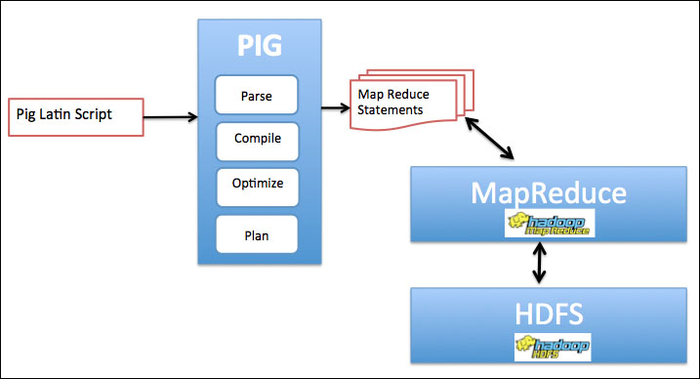

In [8]:
from IPython.display import Image
Image(filename='imgs/pig.jpg') 

### Ejemplo de script

Según el ejemplo en <a href="http://www.wikiwand.com/en/Pig_(programming_tool)">Wikipedia</a>

Observa que con la opción `-x local`, Pig ejecuta el script en local, sin enviarlo a map-reduce.

Examina la salida y trata de interpretar los mensajes de progreso más abajo.

Trata de ejecutar igualmente el script línea por línea en un terminal. Observa que hasta que no se introduce el comando DUMP nada se ejecuta.

In [4]:
!head -3 data/texts/*

==> data/texts/text1.txt <==
Lorem ipsum dolor sit amet, eum no novum dictas eligendi. Mucius recteque sed ea, salutatus prodesset disputationi eum ea. Option integre malorum ea pri. No sit habeo scripta invenire, his iriure quaestio consequuntur ei.

 Lorem recusabo referrentur ea vis, id qui diam vitae sensibus. Amet animal fabulas his cu, equidem scribentur duo ne. Sed in laudem dignissim rationibus. Eum omnis paulo scriptorem ad, ex eos quis vivendo principes. Postea tacimates ad usu, an qui audiam veritus probatus. Ei autem simul pro, maiorum corpora vel no.

==> data/texts/text2.txt <==
Itself Gathering All Image

For Abundantly Replenish Creature Man saying wherein whales herb stars earth third firmament unto first 

==> data/texts/text3.txt <==
Far far away, behind the word mountains, far from the countries Vokalia and Consonantia, there live the 
blind texts. Separated they live in Bookmarksgrove right at the coast of the Semantics, a large language 
ocean. A small river named

In [9]:
%%script pig -x local -4 files/piglog4j.properties
input_lines = LOAD 'data/texts' AS (line:chararray);

-- Extract words from each line and put them into a pig bag''
-- datatype, then flatten the bag to get one word on each row''
words = FOREACH input_lines GENERATE FLATTEN(TOKENIZE(line)) AS word;
 
-- filter out any words that are just white spaces''
filtered_words = FILTER words BY word MATCHES '\\w+';
 
-- create a group for each word''
word_groups = GROUP filtered_words BY word;
 
-- count the entries in each group''
word_count = FOREACH word_groups GENERATE COUNT(filtered_words) AS count, group AS word;
 
-- order the records by count''
ordered_word_count = ORDER word_count BY count DESC;

-- get the most frequent words
limit_result = LIMIT ordered_word_count 50;
dump limit_result;    

grunt> input_lines = LOAD 'data/texts' AS (line:chararray);
grunt> 
grunt> -- Extract words from each line and put them into a pig bag''
grunt> -- datatype, then flatten the bag to get one word on each row''
grunt> words = FOREACH input_lines GENERATE FLATTEN(TOKENIZE(line)) AS word;
grunt>  
grunt> -- filter out any words that are just white spaces''
grunt> filtered_words = FILTER words BY word MATCHES '\\w+';
grunt>  
grunt> -- create a group for each word''
grunt> word_groups = GROUP filtered_words BY word;
grunt>  
grunt> -- count the entries in each group''
grunt> word_count = FOREACH word_groups GENERATE COUNT(filtered_words) AS count, group AS word;
grunt>  
grunt> -- order the records by count''
grunt> ordered_word_count = ORDER word_count BY count DESC;
grunt> 
grunt> -- get the most frequent words
grunt> limit_result = LIMIT ordered_word_count 50;
grunt> dump limit_result;    
(612,the)
(356,and)
(355,he)
(333,to)
(300,a)
(293,of)
(214,that)
(196,his)
(186,it)
(155,was)
(155,

15/07/14 06:58:06 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
15/07/14 06:58:06 INFO pig.ExecTypeProvider: Picked LOCAL as the ExecType
15/07/14 06:58:14 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
15/07/14 06:58:15 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
15/07/14 06:58:16 WARN mapreduce.JobSubmitter: No job jar file set.  User classes may not be found. See Job or Job#setJar(String).
15/07/14 06:58:16 INFO input.FileInputFormat: Total input paths to process : 4
15/07/14 06:58:17 INFO mapreduce.JobSubmitter: number of splits:1
15/07/14 06:58:18 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1805249303_0001
15/07/14 06:58:18 WARN conf.Configuration: file:/tmp/hadoop-user/mapred/staging/user1805249303/.staging/job_local1805249303_0001/job.xml:an attempt to override final parameter: fs.defaultFS;  Ignoring.
15/07/14 06:58:18 WARN conf.Configuration: fi

## Fíjate como el comando explain describe el plan de ejecución que hace PIG

In [8]:
%%script pig -x local -4 files/piglog4j.properties
input_lines = LOAD 'data/texts' AS (line:chararray);

-- Extract words from each line and put them into a pig bag''
-- datatype, then flatten the bag to get one word on each row''
words = FOREACH input_lines GENERATE FLATTEN(TOKENIZE(line)) AS word;
 
-- filter out any words that are just white spaces''
filtered_words = FILTER words BY word MATCHES '\\w+';
 
-- create a group for each word''
word_groups = GROUP filtered_words BY word;
 
-- count the entries in each group''
word_count = FOREACH word_groups GENERATE COUNT(filtered_words) AS count, group AS word;
 
-- order the records by count''
ordered_word_count = ORDER word_count BY count DESC;

-- get the most frequent words
limit_result = LIMIT ordered_word_count 50;
explain limit_result;    

grunt> input_lines = LOAD 'data/texts' AS (line:chararray);
grunt> 
grunt> -- Extract words from each line and put them into a pig bag''
grunt> -- datatype, then flatten the bag to get one word on each row''
grunt> words = FOREACH input_lines GENERATE FLATTEN(TOKENIZE(line)) AS word;
grunt>  
grunt> -- filter out any words that are just white spaces''
grunt> filtered_words = FILTER words BY word MATCHES '\\w+';
grunt>  
grunt> -- create a group for each word''
grunt> word_groups = GROUP filtered_words BY word;
grunt>  
grunt> -- count the entries in each group''
grunt> word_count = FOREACH word_groups GENERATE COUNT(filtered_words) AS count, group AS word;
grunt>  
grunt> -- order the records by count''
grunt> ordered_word_count = ORDER word_count BY count DESC;
grunt> 
grunt> -- get the most frequent words
grunt> limit_result = LIMIT ordered_word_count 50;
grunt> explain limit_result;    
#-----------------------------------------------
# New Logical Plan:
#---------------------------

15/07/14 06:21:53 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
15/07/14 06:21:53 INFO pig.ExecTypeProvider: Picked LOCAL as the ExecType
